# Table of Contents

- 📖 소개
- 🛠️ Setup
- 1️⃣ Predict
- 2️⃣ Validate
- 3️⃣ Train  
  - 📊YOLOv11 학습 시 핵심 Hyperparameter  
    - 🏃‍♂️3.1. 런(Run) 설정 (CLI / Python API)  
    - ⚙️3.2. 최적화(Optimization) Hyperparameter (`--hyp hyp.yaml`)  
    - 🎨3.3. 데이터 Augmentation Hyperparameter
- 💡 4. 모델 내보내기 (Export)  
  - 🚀TensorRT 변환의 주요 이점
- 5️⃣ 주요 태스크(Tasks)  
  - 🕵️‍♂️5.1. 객체 탐지 (Detect)  
  - 🖼️5.2. 분할(Segmentation)  
  - 📋5.3. 분류(Classify)  
  - 🤸5.4. 포즈 추정(Pose)


# 📖소개
이 노트북에서는 Ultralytics의 **YOLOv11** 모델을 다양한 방식으로 학습하고 활용하는 방법을 다룹니다. 이 노트북은 **Google Colab**에서도 실행 및 테스트가 가능합니다.

주요 내용:
- **CLI** 명령어를 사용한 학습·검증·추론 실행 예제  
- **Python API** (`ultralytics.YOLO`)를 통한 코드 기반 학습·검증·추론 예제  

- 사전 학습된 모델을 이용한 다양한 태스크 실습  
  - **Segmentation**  
  - **Action Recognition**  
  - **Classification**  
  - **Pose Estimation**  
  - **Oriented Bounding Boxes (OBB)**  

각 섹션마다 단계별 코드와 결과 시각화를 제공하여, 초심자도 빠르게 따라하며 YOLOv11의 기능을 체험할 수 있도록 구성했습니다.
## 


# 🛠️Setup

이 셀에서는 Python 환경과 필수 라이브러리를 설치하고 런타임 정보를 확인합니다.  

- **Python 버전**: 3.8 이상 권장  
- **CUDA/GPU 사용 가능 여부**: `!nvidia-smi` 로 확인  
- **ultralytics 패키지 권장 버전**: `8.x.x` 대로 고정  

Colab 실행 시 GPU 런타임으로 변경한 뒤 설치하세요.


pip install `ultralytics` and [dependencies](https://github.com/ultralytics/ultralytics/blob/main/pyproject.toml)

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Ganzooo/colab_keti_inference_code/blob/main/YOLO11_Tutorial.ipynb)

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

# 1️⃣ Predict

사전 학습된 모델을 사용해 단일 이미지에 대해 객체 탐지(inference)를 수행합니다.  
- CLI & Python 예제  
- 결과 이미지 위에 바운딩 박스를 그려 보여줌  
---



- CLI 예제

In [3]:
# Download prediction image
!wget -qO img_det_pred.jpg https://raw.githubusercontent.com/Ganzooo/colab_keti_inference_code/main/data/9bb14814.jpg

# Run inference on an image with YOLO11n  
!yolo predict model=yolo11n.pt source=img_det_pred.jpg

Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

image 1/1 /work/10_OTHERS/colab_keti_inference_code/img_det_pred.jpg: 384x640 5 persons, 8 cars, 65.5ms
Speed: 2.7ms preprocess, 65.5ms inference, 64.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to /work/01_DETECTION/ultralytics/runs/detect/predict14
💡 Learn more at https://docs.ultralytics.com/modes/predict


- Python 예제


image 1/1 /work/10_OTHERS/colab_keti_inference_code/img_det_pred.jpg: 384x640 5 persons, 8 cars, 66.2ms
Speed: 2.5ms preprocess, 66.2ms inference, 69.8ms postprocess per image at shape (1, 3, 384, 640)


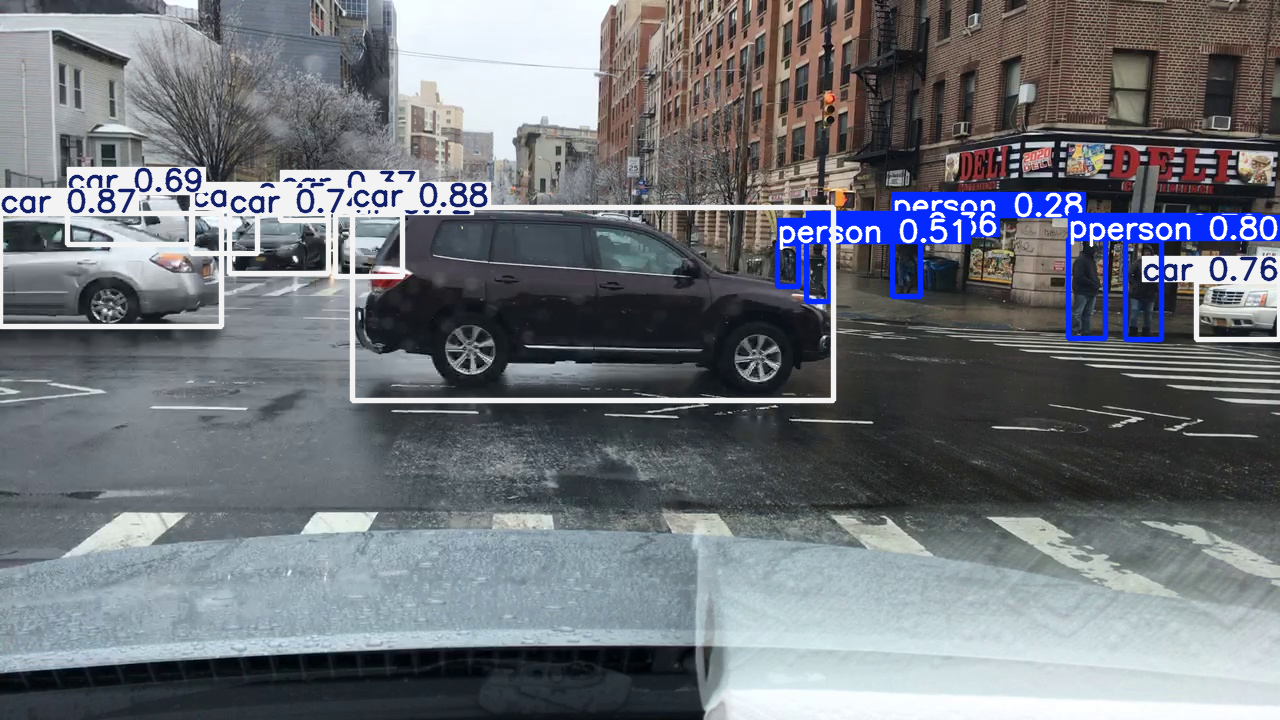

In [4]:
# Load YOLO11n, predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model
result = model('img_det_pred.jpg')[0]  # predict on an image
result.show() # show results

---
# 2️⃣ Validate
- COCO 2017 validation 세트 약 780MB 다운로드  
- 로컬에 이미 있을 경우 스킵하도록 분기 처리
- coco8.yaml 에 대해서 validation해서 결과 
- Sample images


<img align="center" src="https://github.com/ultralytics/docs/releases/download/0/mosaiced-training-batch-1.avif" width="600">


- yolov11-n 모델에서 검증:

<img align="center" src="https://raw.githubusercontent.com/ultralytics/assets/refs/heads/main/yolo/performance-comparison.png" width="600">


In [ ]:
# Download COCO val
import os
import torch

if not os.path.exists('datasets'):
    torch.hub.download_url_to_file('https://ultralytics.com/assets/coco2017val.zip', 'tmp.zip')  # download (780M - 5000 images)
    !unzip -q tmp.zip -d datasets && rm tmp.zip  # unzip    



---

- CLI 예제

In [5]:
# Validate YOLO11n on COCO8 val
!yolo val model=yolo11n.pt data=coco8.yaml

Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2660.8±765.5 MB/s, size: 54.0 KB)
val: Scanning /work/01_DETECTION/datasets/coco8/labels/val.cache... 4 images, 0 
                 Class     Images  Instances      Box(P          R      mAP50  m
                   all          4         17      0.569       0.85      0.847      0.632
                person          3         10      0.554        0.6      0.587      0.273
                   dog          1          1      0.547          1      0.995      0.697
                 horse          1          2      0.528          1      0.995      0.674
              elephant          1          2       0.37        0.5      0.516      0.256
              umbrella          1          1      0.568          1      0.995      0.995
          potted plant          

- Python 예제

In [13]:
from ultralytics import YOLO

# Load a model
model = YOLO('yolo11n.yaml')  # build a new model from scratch
model = YOLO('yolo11n.pt')  # load a pretrained model (recommended for training)

# Use the model
model.val(data='coco8.yaml', plots=True)  # evaluate model performance on the validation set


Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3776.9±1443.6 MB/s, size: 54.0 KB)


val: Scanning /work/01_DETECTION/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.51it/s]


                   all          4         17      0.569       0.85      0.847      0.632
                person          3         10      0.554        0.6      0.587      0.273
                   dog          1          1      0.547          1      0.995      0.697
                 horse          1          2      0.528          1      0.995      0.674
              elephant          1          2       0.37        0.5      0.516      0.256
              umbrella          1          1      0.568          1      0.995      0.995
          potted plant          1          1      0.846          1      0.995      0.895
Speed: 0.5ms preprocess, 28.1ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/detect/val6


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d3215ffbb50>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

---
# 3️⃣ Train
- coco8.yaml 에 대해서 Train 
- 4개 Sample 이미지

### 📊YOLOv11 학습 시 핵심 Hyperparameter

### 🏃‍♂️3.1. 런(Run) 설정 (CLI / Python API)
- **model**  
  - 사용할 모델 파일 또는 구성 (`yolo11n.pt`, `yolo11n.yaml` 등)
- **data**  
  - 데이터셋 구성 파일 (`coco8.yaml`, `custom_data.yaml` 등)
- **epochs**  
  - 학습 전체 반복 횟수 (기본: 300 등)
- **batch**  
  - 배치 크기 (한 번에 처리할 이미지 수)
- **imgsz** (또는 `img-size`)  
  - 입력 이미지 해상도 (예: 640 or `[640, 640]`)
- **device**  
  - GPU/CPU 지정 (`0`, `0,1`, `cpu` 등)
- **workers**  
  - 데이터 로딩을 위한 멀티 프로세스 수
- **project** / **name**  
  - 결과(`runs/train/…`)가 저장될 폴더 이름 지정
- **exist_ok**  
  - 기존 디렉토리 덮어쓰기 허용 여부 (`True`/`False`)
- **save_period**  
  - 체크포인트 저장 주기 (에폭 단위)

---

### ⚙️3.2. 최적화(Optimization) Hyperparameter (`--hyp hyp.yaml`)
YOLO의 기본 하이퍼파라미터 파일(`hyp.ultralytics.yaml`)을 복사·수정하거나, 별도 파일을 만들어 `--hyp`로 지정할 수 있습니다.

| 파라미터            | 설명                                                         | 기본값 예시 |
|-------------------|------------------------------------------------------------|-----------|
| **lr0**           | 초기 학습률 (learning rate)                                    | 0.01      |
| **lrf**           | 마지막 학습률 비율 (최종 lr = lr0 × lrf)                       | 0.1       |
| **momentum**      | SGD 모멘텀                                                   | 0.937     |
| **weight_decay**  | 가중치 감쇠 (L2 regularization)                                | 0.0005    |
| **warmup_epochs** | 워밍업 epoch 수                                              | 3.0       |
| **warmup_momentum** | 워밍업 시 모멘텀 시작값                                      | 0.8       |
| **warmup_bias_lr**  | 워밍업 시 바이어스 LR                                       | 0.1       |
| **box**           | 바운딩박스 손실 가중치                                         | 7.5       |
| **cls**           | 클래스 손실 가중치                                            | 0.5       |
| **obj**           | 객체성(objectness) 손실 가중치                               | 1.0       |
| **iou_t**         | Positive IoU threshold (정답으로 간주할 IoU 최소값)          | 0.20      |
| **anchor_t**      | 앵커 매칭 임계값                                            | 4.0       |
| **fl_gamma**      | Focal loss 감마                                              | 0.0       |

---

### 🎨3.3. 데이터 Augmentation Hyperparameter
| 파라미터        | 설명                                               | 기본값 예시 |
|---------------|--------------------------------------------------|-----------|
| **hsv_h**, **hsv_s**, **hsv_v** | 색조·채도·명도 변형 강도                     | 0.015, 0.7, 0.4 |
| **degrees**    | 회전 각도 범위 (°)                                  | 0.0       |
| **translate**  | 평행 이동 비율                                    | 0.1       |
| **scale**      | 크기 변형 범위                                    | 0.5       |
| **shear**      | 전단 변형 강도                                    | 0.0       |
| **perspective**| 원근 변형 강도                                    | 0.0       |
| **flipud**     | 상하 뒤집기 확률                                   | 0.0       |
| **fliplr**     | 좌우 뒤집기 확률                                   | 0.5       |
| **mosaic**     | 모자이크 증강 확률                                 | 1.0       |
| **mixup**      | MixUp 증강 확률                                    | 0.0       |

---


- CLI 예제

In [11]:
# Train YOLO11n on COCO8 for 3 epochs
!yolo train model=yolo11n.pt data=coco8.yaml epochs=10 imgsz=640

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train16, nbs=64, nms=False, opset=None, optimiz

- Python 예제

In [9]:
from ultralytics import YOLO

model = YOLO('yolo11n.pt')
model.train(
    data='coco8.yaml',
    epochs=10,
    batch=2,
    imgsz=640,
    save_period=5,
    plots=True
)

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=2, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=10, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train15, nbs=64, nms=False, opset=None, optimize

[neptune] [warning] NeptuneWarning: By default, these monitoring options are disabled in interactive sessions: 'capture_stdout', 'capture_stderr', 'capture_traceback', 'capture_hardware_metrics'. You can set them to 'True' when initializing the run and the monitoring will continue until you call run.stop() or the kernel stops. NOTE: To track the source files, pass their paths to the 'source_code' argument. For help, see: https://docs.neptune.ai/logging/source_code/


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3405.0±991.6 MB/s, size: 50.0 KB)


train: Scanning /work/01_DETECTION/datasets/coco8/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 3224.3±981.3 MB/s, size: 54.0 KB)


val: Scanning /work/01_DETECTION/datasets/coco8/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to /work/01_DETECTION/ultralytics/runs/detect/train15/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)


2025/05/12 09:16:52 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 09:16:52 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.
2025/05/12 09:16:52 WARNING mlflow.utils.autologging_utils: MLflow transformers autologging is known to be compatible with 4.25.1 <= transformers <= 4.45.0, but the installed version is 4.47.0. If you encounter errors during autologging, try upgrading / downgrading transformers to a compatible version, or try upgrading MLflow.
2025/05/12 09:16:52 WARNING mlflow.tracking.fluent: Exception raised while enabling autologging for transformers: Failed to import transformers.trainer because of the following error (look up to see its traceback):
Failed to import transformers.integrations.integration_uti

MLflow: logging run_id(5cc7c054c2b84d01a2921b5e7ef57793) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/detect/train15
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10     0.434G      1.124      2.566      1.303          9        640: 100%|██████████| 2/2 [00:00<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.31it/s]

                   all          4         17      0.584       0.85      0.848      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10     0.488G      1.448      3.382      1.719         10        640: 100%|██████████| 2/2 [00:00<00:00, 31.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 50.03it/s]

                   all          4         17      0.614       0.85      0.852       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10     0.488G      1.244      2.962      1.432          3        640: 100%|██████████| 2/2 [00:00<00:00, 37.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 57.06it/s]

                   all          4         17      0.614       0.85      0.852       0.65



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10     0.488G     0.9123      3.185      1.339         10        640: 100%|██████████| 2/2 [00:00<00:00, 34.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 53.80it/s]

                   all          4         17      0.641       0.85      0.857      0.631

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size



       5/10     0.488G      1.042      3.151      1.442          3        640: 100%|██████████| 2/2 [00:00<00:00, 39.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 49.07it/s]

                   all          4         17      0.641       0.85      0.857      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10     0.488G      1.057      3.436      1.437         10        640: 100%|██████████| 2/2 [00:00<00:00, 34.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 38.83it/s]

                   all          4         17      0.644       0.85      0.823      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10     0.488G      1.175      4.148      1.501          3        640: 100%|██████████| 2/2 [00:00<00:00, 35.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 53.23it/s]

                   all          4         17      0.644       0.85      0.823      0.612



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10     0.488G     0.9841      3.084       1.35          3        640: 100%|██████████| 2/2 [00:00<00:00, 38.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 55.35it/s]


                   all          4         17      0.644       0.85      0.823      0.612

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10     0.488G      1.333      2.882      1.677          4        640: 100%|██████████| 2/2 [00:00<00:00, 33.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 56.96it/s]

                   all          4         17      0.645       0.85      0.822      0.614



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10     0.488G     0.9787      3.241      1.339         10        640: 100%|██████████| 2/2 [00:00<00:00, 35.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 58.17it/s]

                   all          4         17      0.645       0.85      0.822      0.614



10 epochs completed in 0.001 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/detect/train15/weights/last.pt, 5.5MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/detect/train15/weights/best.pt, 5.5MB

Validating /work/01_DETECTION/ultralytics/runs/detect/train15/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 68.40it/s]


                   all          4         17      0.614       0.85      0.852      0.652
                person          3         10      0.596        0.6      0.607       0.29
                   dog          1          1      0.556          1      0.995      0.796
                 horse          1          2      0.704          1      0.995      0.674
              elephant          1          2      0.377        0.5      0.527       0.26
              umbrella          1          1      0.582          1      0.995      0.995
          potted plant          1          1      0.869          1      0.995      0.895
Speed: 0.2ms preprocess, 0.9ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/detect/train15
MLflow: results logged to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0, 16, 17, 20, 25, 58])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7d325c21ece0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,

---
# 💡 4. 모델 내보내기 (Export)

Ultralytics YOLO 모델을 다양한 형식으로 변환하려면, `format` 인자를 사용하세요. 지원되는 주요 포맷:

- **ONNX**: `format=onnx`  
- **TorchScript**: `format=torchscript`  
- **CoreML**: `format=coreml`  
- **OpenVINO**: `format=openvino`  (3x CPU speedup)
- **TensorRT**: `format=tensorrt`  (5x GPU speedup)

| Format | `format` Argument | Model | Metadata | Arguments |
|--------|-----------------|-------|----------|------------|
| [PyTorch](https://pytorch.org/) | - | `yolo11n.pt` | ✅ | - |
| [TorchScript](https://docs.ultralytics.com/integrations/torchscript) | `torchscript` | `yolo11n.torchscript` | ✅ | `imgsz`, `batch`, `optimize`, `half`, `nms`, `device` |
| [ONNX](https://docs.ultralytics.com/integrations/onnx) | `onnx` | `yolo11n.onnx` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `opset`, `simplify`, `nms`, `device` |
| [OpenVINO](https://docs.ultralytics.com/integrations/openvino) | `openvino` | `yolo11n_openvino_model/` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `int8`, `nms`, `fraction`, `device`, `data` |
| [TensorRT](https://docs.ultralytics.com/integrations/tensorrt) | `engine` | `yolo11n.engine` | ✅ | `imgsz`, `batch`, `dynamic`, `half`, `int8`, `simplify`, `nms`, `fraction`, `device`, `data`, `workspace` |
| [CoreML](https://docs.ultralytics.com/integrations/coreml) | `coreml` | `yolo11n.mlpackage` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `device` |
| [TF SavedModel](https://docs.ultralytics.com/integrations/tf-savedmodel) | `saved_model` | `yolo11n_saved_model/` | ✅ | `imgsz`, `batch`, `int8`, `keras`, `nms`, `device` |
| [TF GraphDef](https://docs.ultralytics.com/integrations/tf-graphdef) | `pb` | `yolo11n.pb` | ❌ | `imgsz`, `batch`, `device` |
| [TF Lite](https://docs.ultralytics.com/integrations/tflite) | `tflite` | `yolo11n.tflite` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `fraction`, `device`, `data` |
| [TF Edge TPU](https://docs.ultralytics.com/integrations/edge-tpu) | `edgetpu` | `yolo11n_edgetpu.tflite` | ✅ | `imgsz`, `device` |
| [TF.js](https://docs.ultralytics.com/integrations/tfjs) | `tfjs` | `yolo11n_web_model/` | ✅ | `imgsz`, `batch`, `half`, `int8`, `nms`, `device` |
| [PaddlePaddle](https://docs.ultralytics.com/integrations/paddlepaddle) | `paddle` | `yolo11n_paddle_model/` | ✅ | `imgsz`, `batch`, `device` |
| [MNN](https://docs.ultralytics.com/integrations/mnn) | `mnn` | `yolo11n.mnn` | ✅ | `imgsz`, `batch`, `half`, `int8`, `device` |
| [NCNN](https://docs.ultralytics.com/integrations/ncnn) | `ncnn` | `yolo11n_ncnn_model/` | ✅ | `imgsz`, `batch`, `half`, `device` |
| [IMX500](https://docs.ultralytics.com/integrations/sony-imx500) | `imx` | `yolov8n_imx_model/` | ✅ | `imgsz`, `int8`, `fraction`, `device`, `data` |
| [RKNN](https://docs.ultralytics.com/integrations/rockchip-rknn) | `rknn` | `yolo11n_rknn_model/` | ✅ | `imgsz`, `int8`, `batch`, `name`, `device` |

---

- CLI 예제

In [1]:
!yolo export model=yolo11n.pt format=onnx

Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CPU (12th Gen Intel Core(TM) i9-12900K)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)
requirements: Ultralytics requirement ['onnxruntime'] not found, attempting AutoUpdate...

[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 38.4 MB/s eta 0:00:00a 0:00:01

requirements: AutoUpdate success ✅ 4.5s, installed 1 package: ['onnxruntime']
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.15.0rc2 opset 17...
ONNX: slimming with onnxsli

- Python 예제

In [2]:
# Python API 예시: TensorRT 형식으로 내보내기
from ultralytics import YOLO
model = YOLO('yolo11n.pt')
model.export(format='tensorrt')

WARNING ⚠️ TensorRT requires GPU export, automatically assigning device=0
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n summary (fused): 100 layers, 2,616,248 parameters, 0 gradients, 6.5 GFLOPs

PyTorch: starting from 'yolo11n.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 84, 8400) (5.4 MB)

ONNX: starting export with onnx 1.15.0rc2 opset 17...
ONNX: slimming with onnxslim 0.1.52...
ONNX: export success ✅ 1.6s, saved as 'yolo11n.onnx' (10.2 MB)

TensorRT: starting export with TensorRT 8.6.1...
[05/12/2025-09:27:16] [TRT] [I] [MemUsageChange] Init CUDA: CPU +2, GPU +0, now: CPU 597, GPU 5650 (MiB)
[05/12/2025-09:27:20] [TRT] [I] [MemUsageChange] Init builder kernel library: CPU +1453, GPU +269, now: CPU 2126, GPU 5915 (MiB)
[05/12/2025-09:27:20] [TRT] [I] ----------------------------------------------------------------
[05/12/2025-09:27:20] [TRT] [I] Input filename:   yolo11n.onnx
[05/12/2025-09:27:

'yolo11n.engine'

## 🚀TensorRT 변환의 주요 이점

YOLOv11 모델을 TensorRT 형식으로 내보내면, 다음과 같은 장점을 얻을 수 있습니다:

- **GPU 추론 속도 대폭 향상**  
  - 최적화된 CUDA 커널을 사용해 최대 **5×** 빠른 추론 성능  
  - 동시 처리량(throughput) 증가로 배치 처리 효율 개선  

- **낮은 지연(Latency)**  
  - 실시간 애플리케이션(드론, 자율주행 등)에 적합한 초저지연 추론  
  - 파이프라인 오버헤드 최소화  

- **FP16 / INT8 정밀도 지원**  
  - 16-bit 및 8-bit 정밀도로 모델 크기 축소 및 연산량 감소  
  - 적절한 양자화(quantization)로 정확도 손실을 최소화하면서 속도 대폭 개선  

- **메모리 사용 최적화**  
  - 동적 텐서 메모리 할당 및 재사용으로 GPU 메모리 풋프린트 감소  
  - 대규모 배치 또는 고해상도 입력 처리 시 안정성 확보  

- **플러그인 레이어 및 커스텀 연산 지원**  
  - 특정 연산(예: NMS)을 TensorRT 플러그인으로 교체해 추가 최적화  
  - 사용자 정의 레이어 통합으로 유연한 모델 확장 가능  

> TensorRT로 변환하면 하드웨어 성능을 최대한 활용하여, **실시간 처리**와 **고효율 배포**가 모두 필요한 시스템에서 최적의 결과를 얻을 수 있습니다. 

---
# 5️⃣ 주요 태스크(Tasks)

YOLOv11은 비전 AI에서 자주 사용되는 다양한 태스크에 대해 **학습(train)**, **검증(val)**, **추론(predict)**, **내보내기(export)** 기능을 지원합니다.  
아래 4가지 주요 태스크를 제공합니다. 각 링크에서 더 상세한 사용법과 예제를 확인할 수 있습니다. [Detect](https://docs.ultralytics.com/tasks/detect/), [Segment](https://docs.ultralytics.com/tasks/segment/), [Classify](https://docs.ultralytics.com/tasks/classify/) and [Pose](https://docs.ultralytics.com/tasks/pose/)

<br><img width="1024" src="https://raw.githubusercontent.com/ultralytics/assets/main/im/banner-tasks.png">


### 🕵️‍♂️5.1. 객체 탐지 (Detect)  
- 이미지나 동영상에서 사람·차량·동물 등 사물의 위치(바운딩 박스)와 클래스 레이블을 동시에 예측합니다.  
- 각 객체의 좌표(x, y, w, h), 클래스 확률, 클래스 이름  


image 1/1 /work/10_OTHERS/colab_keti_inference_code/img_det_pred.jpg: 384x640 5 persons, 8 cars, 3.3ms
Speed: 1.0ms preprocess, 3.3ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


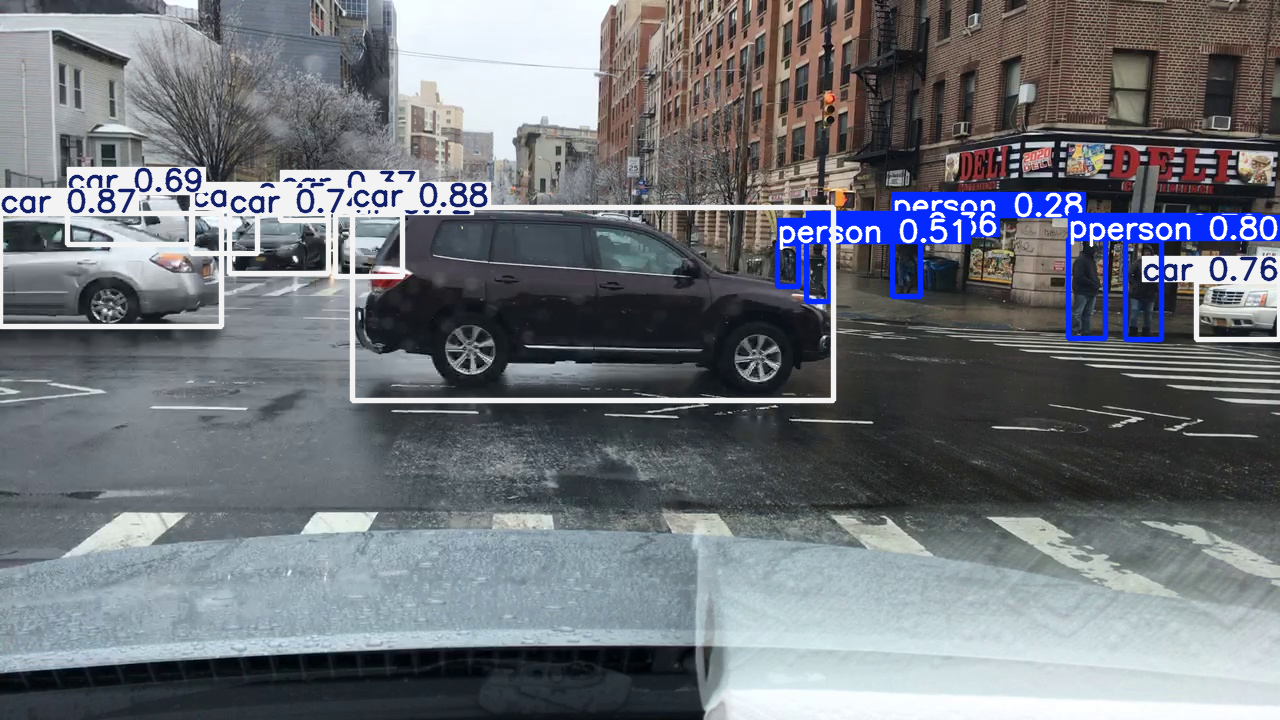

In [ ]:
# Load YOLO11n, train it on COCO128 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n.pt')  # load a pretrained YOLO detection model
result = model('img_det_pred.jpg')[0]  # predict on an image
result
result.show() # show results

## 🖼️5.2. 분할(Segmentation)
- 사전 CoCo을 기반으로 학습된 `yolo11n-seg.pt` 기반으로 학습한다
- 이미지 내 객체의 픽셀 단위 마스크(mask)를 예측하여, 정확한 형태 정보를 제공합니다.


New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8-seg.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, opti

train: Scanning /work/01_DETECTION/datasets/coco8-seg/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1029.4±93.2 MB/s, size: 54.0 KB)


val: Scanning /work/01_DETECTION/datasets/coco8-seg/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to /work/01_DETECTION/ultralytics/runs/segment/train2/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 90 weight(decay=0.0), 101 weight(decay=0.0005), 100 bias(decay=0.0)


2025/05/12 09:37:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/12 09:37:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 09:37:57 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 09:37:57 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


MLflow: logging run_id(204fb33c992e4ad39b2ff82cea3090a4) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/segment/train2
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.881G      1.087      2.119      2.746      1.358         19        640: 100%|██████████| 1/1 [00:00<00:00,  8.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 16.54it/s]

                   all          4         17      0.802       0.89      0.939      0.666      0.745      0.833      0.822      0.567



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        2/3     0.943G      1.069       3.38      2.905      1.413         23        640: 100%|██████████| 1/1 [00:00<00:00, 20.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 34.66it/s]

                   all          4         17      0.784      0.895      0.939      0.663      0.726      0.837      0.822      0.565



      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.943G      1.186      2.838      3.119      1.446         26        640: 100%|██████████| 1/1 [00:00<00:00, 21.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 34.28it/s]

                   all          4         17       0.78      0.904      0.939      0.668      0.717      0.842      0.822      0.562



3 epochs completed in 0.001 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/segment/train2/weights/last.pt, 6.1MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/segment/train2/weights/best.pt, 6.1MB

Validating /work/01_DETECTION/ultralytics/runs/segment/train2/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n-seg summary (fused): 113 layers, 2,868,664 parameters, 0 gradients, 10.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95):   0%|          | 0/1 [00:00<?, ?it/s]

WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...
WARNING ⚠️ Limiting validation plots to first 50 items per image for speed...


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 26.41it/s]


                   all          4         17      0.799       0.89      0.939      0.667      0.742      0.833      0.822      0.567
                person          3         10      0.818        0.5      0.661        0.3      0.818        0.5      0.616      0.263
                   dog          1          1      0.749          1      0.995      0.895      0.749          1      0.995      0.895
                 horse          1          2      0.624          1      0.995      0.581      0.624          1      0.828        0.2
              elephant          1          2          1      0.843      0.995      0.332      0.657        0.5        0.5       0.25
              umbrella          1          1      0.675          1      0.995      0.995      0.675          1      0.995      0.895
          potted plant          1          1      0.929          1      0.995      0.895      0.929          1      0.995      0.895
Speed: 0.3ms preprocess, 2.7ms inference, 0.0ms loss, 1.2ms postproce

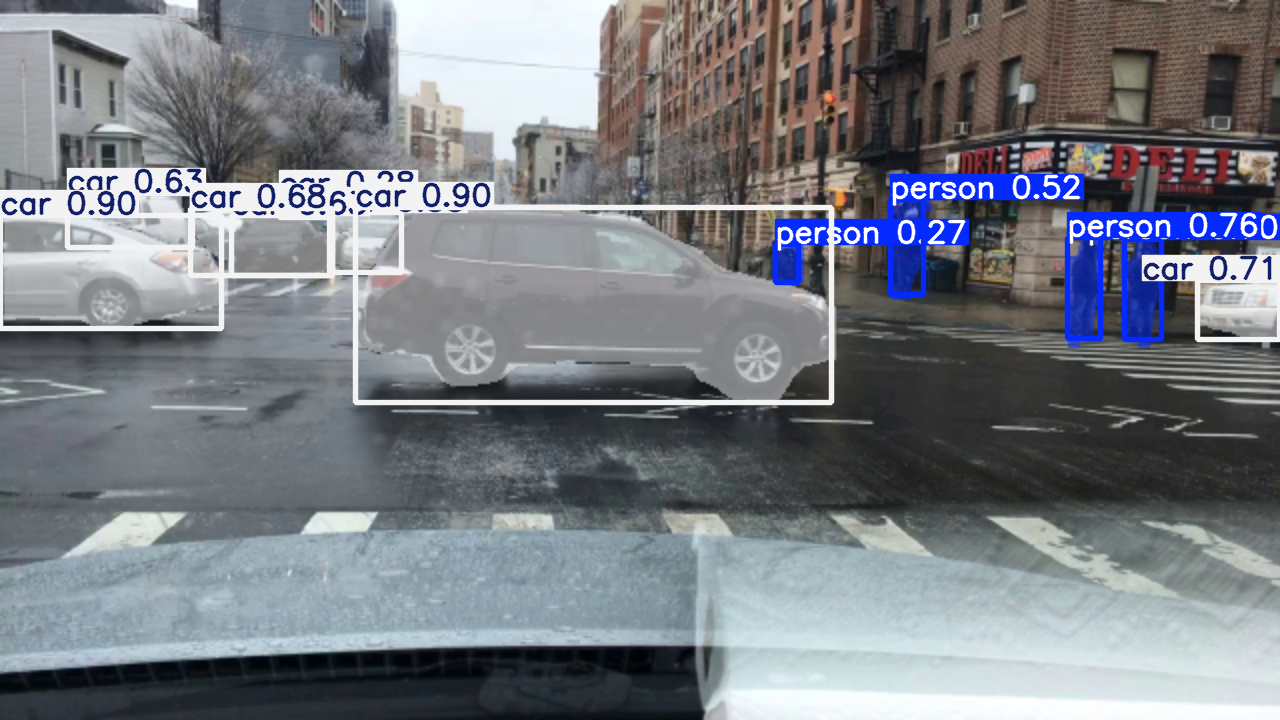

In [6]:
# Load YOLO11n-seg, train it on COCO128-seg for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-seg.pt')  # load a pretrained YOLO segmentation model
model.train(data='coco8-seg.yaml', epochs=3)  # train the model
result_seg = model('img_det_pred.jpg')[0]  # predict on an image
result_seg.show()  # plot the results

## 📋5.3. 분류(Classify)
- 사전 ImageNet을 기반으로 학습된 `yolo11n-cls.pt` 기반으로 학습한다
- 입력 이미지 전체에 대해 하나의 클래스 레이블을 예측한다

New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=mnist160, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=224, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-cls.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train13, nbs=64, nms=False, opset=None, optimize=

train: Scanning /work/01_DETECTION/datasets/mnist160/train... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 15.4±7.7 MB/s, size: 0.3 KB)


val: Scanning /work/01_DETECTION/datasets/mnist160/test... 80 images, 0 corrupt: 100%|██████████| 80/80 [00:00<?, ?it/s]


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000714, momentum=0.9) with parameter groups 39 weight(decay=0.0), 40 weight(decay=0.0005), 40 bias(decay=0.0)


2025/05/12 09:48:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/12 09:48:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 09:48:15 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 09:48:15 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


MLflow: logging run_id(c05dcd38b6af461ebdfe433b2e03eda8) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 224 train, 224 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/classify/train13
Starting training for 3 epochs...

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 165.85it/s]

                   all        0.1      0.488

      Epoch    GPU_mem       loss  Instances       Size



               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 154.05it/s]

                   all      0.138      0.512



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 165.93it/s]

                   all     0.0625      0.538



3 epochs completed in 0.000 hours.
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/classify/train13/weights/last.pt, 3.2MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/classify/train13/weights/best.pt, 3.2MB

Validating /work/01_DETECTION/ultralytics/runs/classify/train13/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n-cls summary (fused): 47 layers, 1,538,834 parameters, 0 gradients, 3.2 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /work/01_DETECTION/datasets/mnist160/train... found 80 images in 10 classes ✅ 
val: /work/01_DETECTION/datasets/mnist160/test... found 80 images in 10 classes ✅ 
test: /work/01_DETECTION/datasets/mnist160/test... found 80 images in 10 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 3/3 [00:00<00:00, 93.57it/s]


                   all      0.138      0.512
Speed: 0.1ms preprocess, 0.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/classify/train13
MLflow: results logged to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'

image 1/1 /work/10_OTHERS/colab_keti_inference_code/img_det_pred.jpg: 224x224 7 0.16, 8 0.14, 5 0.14, 6 0.13, 9 0.13, 1.6ms
Speed: 4.6ms preprocess, 1.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)


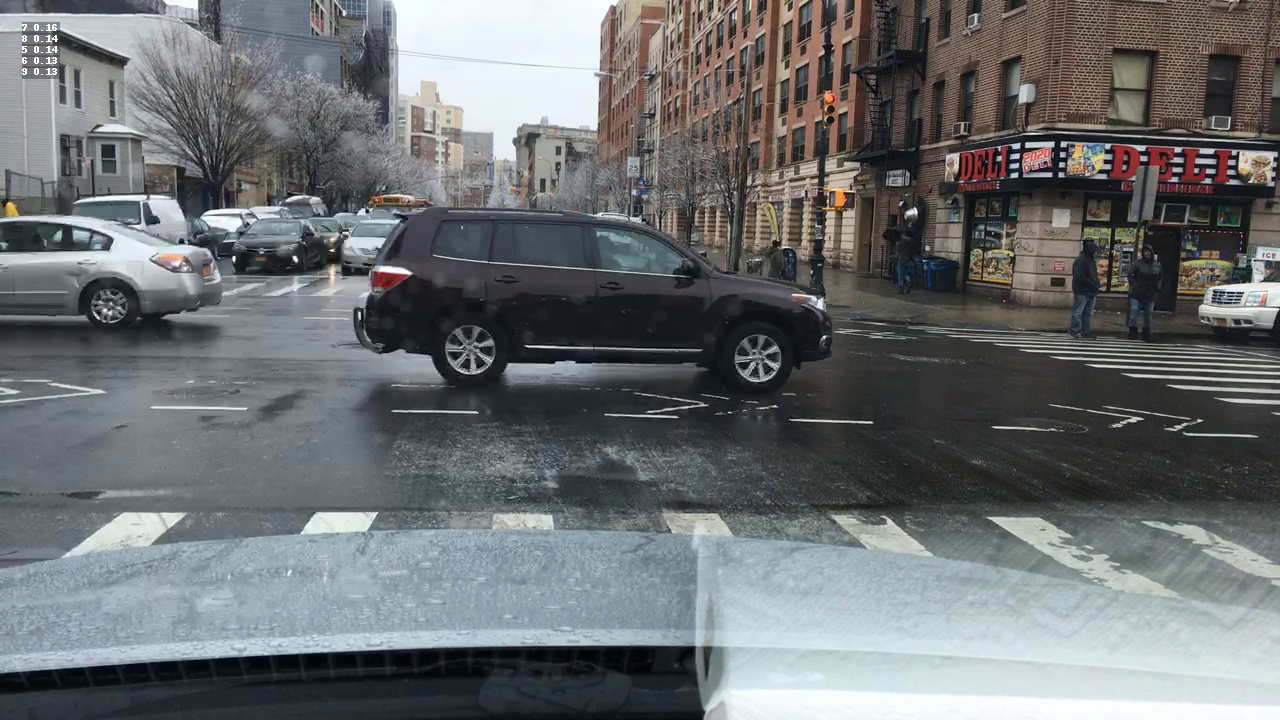

In [15]:
# Load YOLO11n-cls, train it on mnist160 for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-cls.pt')  # load a pretrained YOLO classification model
model.train(data='mnist160', epochs=3)  # train the model
result_classification = model('img_det_pred.jpg')  # predict on an image
result_classification
result_classification[0].show()  # plot the results

## 🤸5.4. 포즈 추정(Pose)
- 사전 CoCo을 기반으로 학습된 `yolo11n-pose.pt` 기반으로 학습한다
- 이미지 내 객체의 픽셀 단위 마스크(mask)를 예측하여, 정확한 형태 정보를 제공합니다.



New https://pypi.org/project/ultralytics/8.3.131 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=coco8-pose.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=3, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n-pose.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train4, nbs=64, nms=False, opset=None, op

train: Scanning /work/01_DETECTION/datasets/coco8-pose/labels/train.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]

albumentations: ImageCompression.__init__() got an unexpected keyword argument 'quality_range'


val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 774.7±92.1 MB/s, size: 39.1 KB)


val: Scanning /work/01_DETECTION/datasets/coco8-pose/labels/val.cache... 4 images, 0 backgrounds, 0 corrupt: 100%|██████████| 4/4 [00:00<?, ?it/s]


Plotting labels to /work/01_DETECTION/ultralytics/runs/pose/train4/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 87 weight(decay=0.0), 97 weight(decay=0.0005), 96 bias(decay=0.0)


2025/05/12 09:56:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for sklearn.
2025/05/12 09:56:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for tensorflow.
2025/05/12 09:56:32 WARNING mlflow.utils.autologging_utils: MLflow keras autologging is known to be compatible with 3.0.2 <= keras <= 3.5.0, but the installed version is 3.9.2. If you encounter errors during autologging, try upgrading / downgrading keras to a compatible version, or try upgrading MLflow.
2025/05/12 09:56:32 INFO mlflow.tracking.fluent: Autologging successfully enabled for keras.


MLflow: logging run_id(606d44c1aaf641d480e46d4c26536edb) to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: view at http://127.0.0.1:5000 with 'mlflow server --backend-store-uri /work/01_DETECTION/ultralytics/runs/mlflow'
MLflow: disable with 'yolo settings mlflow=False'
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to /work/01_DETECTION/ultralytics/runs/pose/train4
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        1/3     0.973G      1.303      3.159     0.4371      1.012      1.559         11        640: 100%|██████████| 1/1 [00:00<00:00, 17.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 28.02it/s]

                   all          4         14      0.806       0.89      0.907      0.718      0.982      0.643      0.763      0.354

      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size



        2/3     0.973G      1.671      4.093     0.3854      1.163      1.562          9        640: 100%|██████████| 1/1 [00:00<00:00, 23.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 31.86it/s]

                   all          4         14      0.805      0.883      0.907      0.713      0.981      0.643      0.763       0.36



      Epoch    GPU_mem   box_loss  pose_loss  kobj_loss   cls_loss   dfl_loss  Instances       Size


        3/3     0.973G      1.688      1.929     0.2946       1.33      1.814          8        640: 100%|██████████| 1/1 [00:00<00:00, 20.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 33.06it/s]

                   all          4         14      0.825      0.857      0.907      0.709      0.981      0.643      0.757      0.356

3 epochs completed in 0.001 hours.


Optimizer stripped from /work/01_DETECTION/ultralytics/runs/pose/train4/weights/last.pt, 6.1MB
Optimizer stripped from /work/01_DETECTION/ultralytics/runs/pose/train4/weights/best.pt, 6.1MB

Validating /work/01_DETECTION/ultralytics/runs/pose/train4/weights/best.pt...
Ultralytics 8.3.129 🚀 Python-3.10.12 torch-2.2.0a0+81ea7a4 CUDA:0 (NVIDIA GeForce RTX 3090 Ti, 24233MiB)
YOLO11n-pose summary (fused): 109 layers, 2,866,468 parameters, 0 gradients, 7.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Pose(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00, 58.61it/s]


                   all          4         14      0.805      0.888      0.907      0.711      0.981      0.643      0.763       0.36
Speed: 0.3ms preprocess, 1.1ms inference, 0.0ms loss, 0.4ms postprocess per image
Results saved to /work/01_DETECTION/ultralytics/runs/pose/train4
MLflow: results logged to /work/01_DETECTION/ultralytics/runs/mlflow
MLflow: disable with 'yolo settings mlflow=False'

Found https://ultralytics.com/images/bus.jpg locally at bus.jpg
image 1/1 /work/10_OTHERS/colab_keti_inference_code/bus.jpg: 640x480 4 persons, 104.9ms
Speed: 1.2ms preprocess, 104.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 480)


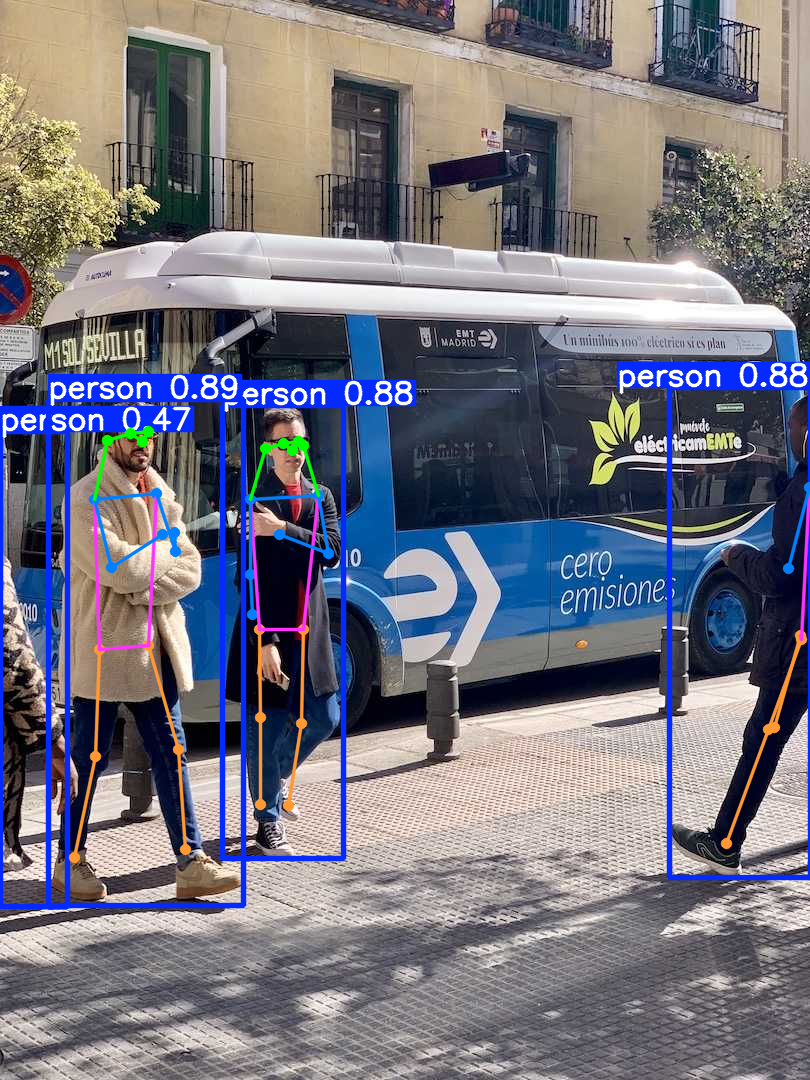

ultralytics.engine.results.Keypoints object with attributes:

conf: tensor([[0.9910, 0.9282, 0.9873, 0.4178, 0.9336, 0.9907, 0.9976, 0.9236, 0.9885, 0.8998, 0.9745, 0.9970, 0.9985, 0.9950, 0.9975, 0.9791, 0.9861],
        [0.1598, 0.1607, 0.0462, 0.2405, 0.0496, 0.6846, 0.2280, 0.6117, 0.1008, 0.4618, 0.1226, 0.7317, 0.5002, 0.7620, 0.5446, 0.5968, 0.4294],
        [0.9894, 0.9332, 0.9796, 0.5537, 0.9105, 0.9953, 0.9977, 0.9472, 0.9784, 0.9140, 0.9490, 0.9984, 0.9988, 0.9956, 0.9966, 0.9786, 0.9815],
        [0.0983, 0.0382, 0.0645, 0.0379, 0.0701, 0.2024, 0.2400, 0.2491, 0.3148, 0.3302, 0.3610, 0.2712, 0.2936, 0.2330, 0.2493, 0.1368, 0.1396]], device='cuda:0')
data: tensor([[[1.4263e+02, 4.4192e+02, 9.9104e-01],
         [1.4818e+02, 4.3152e+02, 9.2817e-01],
         [1.3079e+02, 4.3346e+02, 9.8726e-01],
         [0.0000e+00, 0.0000e+00, 4.1783e-01],
         [1.0715e+02, 4.4079e+02, 9.3361e-01],
         [1.5692e+02, 4.9325e+02, 9.9069e-01],
         [9.4238e+01, 4.9943e+02, 9.9758e-

In [17]:
# Load YOLO11n-pose, train it on COCO8-pose for 3 epochs and predict an image with it
from ultralytics import YOLO

model = YOLO('yolo11n-pose.pt')  # load a pretrained YOLO pose model
model.train(data='coco8-pose.yaml', epochs=3)  # train the model
result_pose = model('https://ultralytics.com/images/bus.jpg')  # predict on an image
result_pose
result_pose[0].show()  # plot the results
result_pose[0].keypoints  # get the keypoints

> 각 태스크별로 학습, 검증, 추론, 그리고 ONNX/TensorRT 등 다양한 형식으로 내보내기(export)를 지원하므로, 여러분의 애플리케이션 요구사항에 맞춰 자유롭게 조합하여 사용할 수 있습니다.